# Задание 10. Линейные модели для регрессии

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
df_w = pd.read_csv("D:\data\winequality-white.csv", sep=";")
df_w.insert(0, 'color', 0)
df_w.columns = df_w.columns.str.replace(" ", "_")

df_r = pd.read_csv("D:\data\winequality-red.csv", sep=";")
df_r.insert(0, 'color', 1)
df_r.columns = df_r.columns.str.replace(" ", "_")

df = pd.concat([df_w, df_r])
df.head()

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
array = df.values
array

array([[ 0.   ,  7.   ,  0.27 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 0.   ,  6.3  ,  0.3  , ...,  0.49 ,  9.5  ,  6.   ],
       [ 0.   ,  8.1  ,  0.28 , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 1.   ,  6.3  ,  0.51 , ...,  0.75 , 11.   ,  6.   ],
       [ 1.   ,  5.9  ,  0.645, ...,  0.71 , 10.2  ,  5.   ],
       [ 1.   ,  6.   ,  0.31 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
X = array[:, :-1]
y = array[:, -1]
y

array([6., 6., 6., ..., 6., 5., 6.])

X - параметры вина, y - его оценка от 0 до 10 

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
scoring = 'neg_mean_squared_error'

## Линейная регрессия

In [ ]:
model = LinearRegression()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.5390618298469365

In [ ]:
res.std()

0.04303559825130108

Модель предсказывает оценку довольно точно, т.к. стандартное отклонение и среднее значений функции (NMSE) довольно мало

## Гребневая регрессия

In [ ]:
model = Ridge()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.5428257020550566

In [ ]:
res.std()

0.041084477129181174

## Лассо регрессия

In [ ]:
model = Lasso()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.7604019450912347

In [ ]:
res.std()

0.042281492950416895

Модель хуже, чем предыдущие две т.к. больше среднее значение функции ошибки

## Эластичная сеть

In [ ]:
model = ElasticNet()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.7527699934573332

In [ ]:
res.std()

0.0414224398713594

Модель показала результат, который хуже, чем у других моделей.

**Итог**: Все модели выполнили свою задачу хорошо, значения NMSE довольно мало и отличается максимум на 0.01. Лучшими моделями оказались линейная регрессия и гребневая регрессия

# Задание 11. Нелинейные модели для регрессии

## Метод ближайших соседей

In [ ]:
model = KNeighborsRegressor()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.6347665283868673

In [ ]:
res.std()

0.044581843791970624

Результат хуже чем те, что в среднем показывали модели раньше. Значение функции ошибки больше среднего для линейных моделей примерно на 0.1 

## Решающее дерево

In [ ]:
model = KNeighborsRegressor()
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.6347665283868673

In [ ]:
res.std()

0.044581843791970624

Результат также хуже чем у линейных моделей в среднем, но стандартное отклонение такое же

## Метод опорных векторов

In [ ]:
model = SVR(gamma='auto')
res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [ ]:
res.mean()

-0.5215694595419524

In [ ]:
res.std()

0.0453732583921996

Метод опорных векторов показа лучший результат из всех рассмотренных моделей

# Выбор лучшего алгоритма для регрессии

In [ ]:
LinRegr = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
ElasticNet = ElasticNet()
KNN = KNeighborsRegressor()
DTree = DecisionTreeRegressor()
SVM = SVR()

models = [LinRegr, Ridge, Lasso, ElasticNet, KNN, DTree, SVM]

In [ ]:
results = []
names = ['LinRegr', 'Ridge', 'Lasso', 'ElasticNet', 'KNN', 'DTree', 'SVM']

In [ ]:
for model in models:
    cv_res = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_res)

In [ ]:
res_mean = []
res_std = []
for i in results:
    res_mean.append(i.mean())
    res_std.append(i.std())

In [ ]:
pd.DataFrame({'name' : names, 'scoring': res_mean, 'std': res_std})

,name,scoring,std
0,LinRegr,-0.539062,0.043036
1,Ridge,-0.542826,0.041084
2,Lasso,-0.760402,0.042281
3,ElasticNet,-0.752770,0.041422
4,KNN,-0.634767,0.044582
5,DTree,-0.681706,0.061147
6,SVM,-0.635320,0.040547


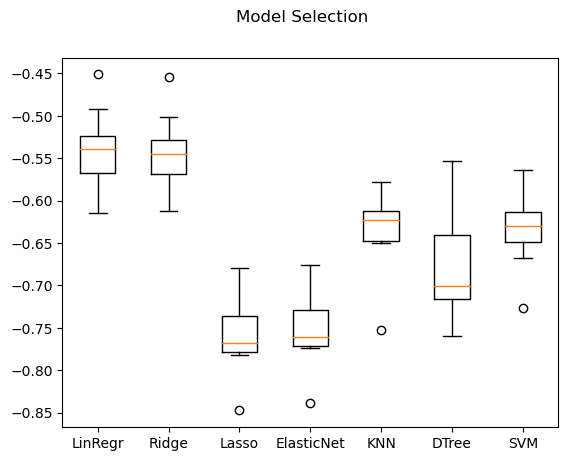

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.suptitle("Model Selection")
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Можно сделать вывод, что лучше всего с поставленными данными справились **линейная регрессия, гребневая регрессия**. Из нелинейных алгоритмов можно выделить **KNN и нелинейный метод опорных векторов**, но они проигрывают линейным моделям 